In [1]:
from numpy import *
from pylab import *
%matplotlib inline

In [2]:
def gillespie(bm, am, bn, an, steps):
    t = 0
    m = 0
    n = 0

    M = [m] #all mRNA types
    N = [n] #all protein types
    T = [t] #total steps in time
    Tp = [] #

    for i in range(steps):
        a1 = bm  #TRANSCRIPTION increase in mRNA
        a2 = am*m #DENATURATION decrease in mRNA
        a3 = bn*m #TRANSLATION increase in proteins
        a4 = an*n #DENATURATION decrease in proteins
        A = a1+a2+a3+a4 #NEW STATE combination of changes
        # A is the sum of all things that can happen
        r1 = rand() #RANDOM SAMPLING to choose a reaction
        t1 = -log(r1)/A #extract time interval from random sampling
        t += t1 #time increase
        r2 = rand() 
        if r2 < a1/A:#gli eventi avvengono in maniera casuale
                     #ognuno con la propria probabilità 
                     #sul totale delle cose che possono accadere
            m += 1
        elif r2 < (a1+a2)/A:
            m -= 1
        elif r2 < (a1+a2+a3)/A:
            n += 1
            Tp += [t]
        else:
            n -= 1
        M += [m] #after the cycle update the arrays
        N += [n]
        T += [t]

    T = array(T)
    Tp = array(Tp)
    M = array(M)
    N = array(N)
    
    return M,N,T,Tp

In [3]:
am = 1/1.5
mbar = 0.037
bm = mbar*am

an = 1/60
bn = 2.67

In [37]:
steps = 100000

M, N, T, Tp = gillespie(bm, am, bn, an, steps)

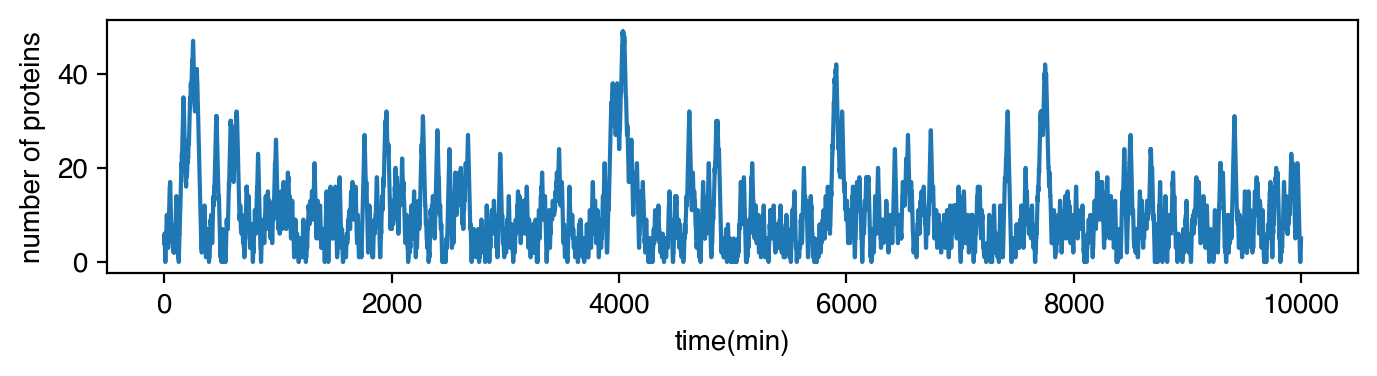

In [47]:
figure(figsize=(7,2))
plot(N[-10000:])
xlabel("time(min)")
ylabel("number of proteins")
tight_layout()
savefig("traj.png", dpi=300)

In [39]:
print("average M: %.3f   expected: %.3f" % (sum(M[:-1]*diff(T[:]))/T[-1], bm/am))
print("average N: %.3f   expected: %.3f" % (sum(N[:-1]*diff(T[:]))/T[-1], bn*bm/an/am))

average M: 0.037   expected: 0.037
average N: 6.009   expected: 5.927


In [40]:
dt = 3
Tmax = max(Tp)
tx,nx = unique(dt*rint(Tp/dt), return_counts=True)

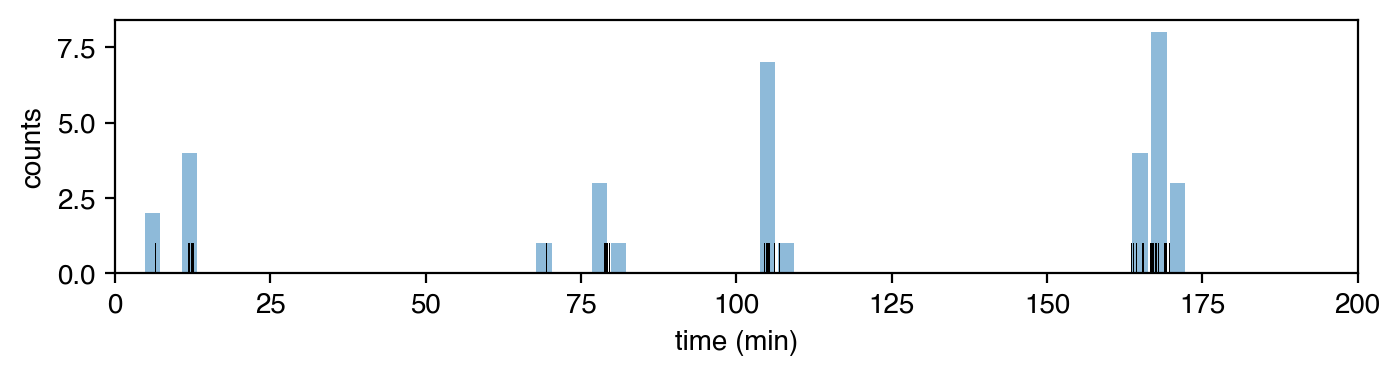

In [46]:
Tmax = 200
figure(figsize=(7,2))
bar(tx[tx<Tmax], nx[tx<Tmax], width=2.5, alpha=.5)
bar(Tp[Tp<Tmax], 1, width=.2, color="k")
xlim(0, Tmax)
xlabel("time (min)")
ylabel("counts")
tight_layout()
savefig("simubursts.png", dpi=300)

In [26]:
def findburst(tx, nx):
    Tb = []
    Nb = []
    
    BURST = True
    tb = tx[0]
    nb = nx[0]
    for i in range(1,len(tx)):
        if tx[i]-tx[i-1] == 3:
            nb += nx[i]
        else: 
            # a burst has finished...
            Tb += [tb]
            Nb += [nb]
            # and a new one is starting
            nb = nx[i]
            tb = tx[i]
    Tb += [tb]
    Nb += [nb]
    
    return array(Tb), array(Nb)

In [14]:
Tb, Nb = findburst(tx, nx)

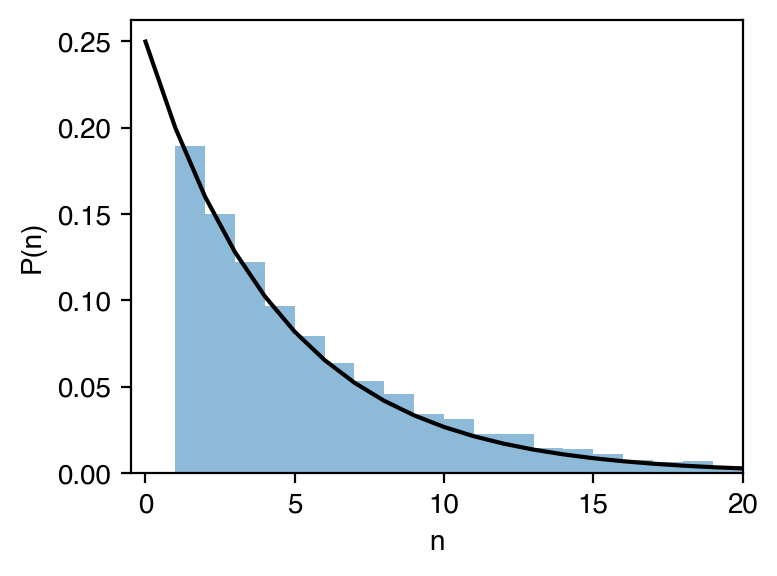

In [48]:
hist(Nb, range=[0,32], bins=32, density=True, alpha=.5);
nn = arange(30)
rho = bn/(bn+am)
plot(nn, (1-rho)/rho*rho**nn, 'k')
xlabel("n")
ylabel("P(n)")
xlim(-.5, 20)
tight_layout()
savefig("Pn.png", dpi=300)